# Problem 5.1: Solar Power - data reader

The following is a small program to read the data file "data_SolarPower.txt", which contains three columns: Year, cumulative solar power capacity (in MW), and Price (USD/Watt installed)

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import random
from scipy.optimize import curve_fit

In [2]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [3]:
# Read the data and print it to check it:
import numpy as np

year, capacity, price = np.loadtxt("data_SolarPower.txt", skiprows=2, delimiter="\t", unpack=True)

print("Number of entries: ", len(year))
for i in range(len(year)) : 
    print(f"  {int(year[i]):4d}:  {capacity[i]:10.2f}   {price[i]:7.3f}")

Number of entries:  44
  1976:        0.30   106.100
  1977:        0.85    80.630
  1978:        1.80    56.230
  1979:        3.30    47.740
  1980:        6.50    35.010
  1981:       12.50    26.520
  1982:       20.00    22.280
  1983:       43.00    19.090
  1984:       67.00    16.970
  1985:       90.00    14.850
  1986:      120.00    11.140
  1987:      150.00     8.486
  1988:      175.00     7.532
  1989:      220.00     8.168
  1990:      270.00     8.805
  1991:      330.00     7.956
  1992:      400.00     7.213
  1993:      450.00     7.107
  1994:      500.00     6.365
  1995:      575.00     5.834
  1996:      700.00     6.046
  1997:      800.00     6.365
  1998:      975.00     5.728
  1999:     1250.00     5.092
  2000:     1500.00     4.879
  2001:     1750.00     4.773
  2002:     2300.00     4.031
  2003:     3000.00     3.978
  2004:     4300.00     4.137
  2005:     6000.00     4.243
  2006:     8500.00     4.455
  2007:    10300.00     4.137
  2008:    20000.

[15.915   12.0945   8.4345   7.161    5.2515   3.978    3.342    2.8635
  2.5455   2.2275   1.671    1.2729   1.1298   1.2252   1.32075  1.1934
  1.08195  1.06605  0.95475  0.8751   0.9069   0.95475  0.8592   0.7638
  0.73185  0.71595  0.60465  0.5967   0.62055  0.63645  0.66825  0.62055
  0.51705  0.3579   0.3066   0.25155  0.1314   0.1044   0.09615  0.0894
  0.0825   0.0693   0.06165  0.05655]


Text(0, 0.5, 'Solar PV Module Cost (2019 US$ per W)')

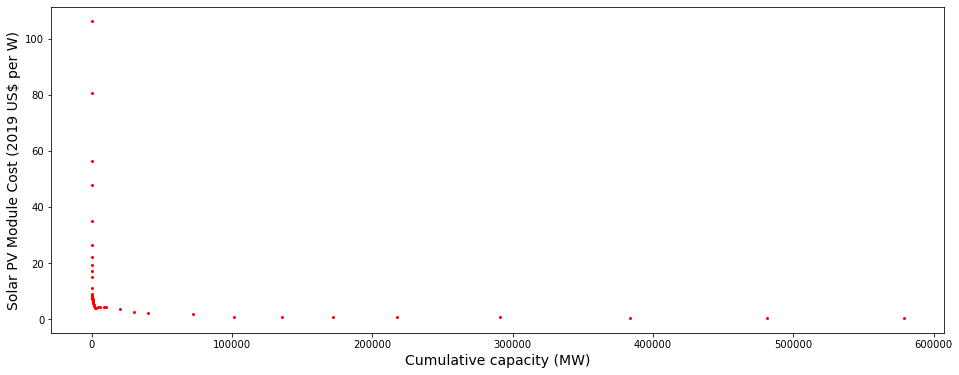

In [4]:
x = capacity
y = price
sy = np.empty(44)

for j in range(0,44):
    sy[j] = y[j]*0.15   # error是price的15%
print(sy)
plt.figure(figsize=(16,6),facecolor='w')
plt.plot(x, y,'ro',markersize=2)
plt.xlabel('Cumulative capacity (MW)',fontsize=14)
plt.ylabel('Solar PV Module Cost (2019 US$ per W)',fontsize=14)

#plt.savefig('fig1',dpi=600)
#fig.tight_layout()

In [5]:
def fit_pdf(x, a, b):  
    return a*x**(-b)

In [6]:

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(a,b) :
    y_fit = fit_pdf(x,a,b)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf, x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,a=2,b=1)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 86.6                       │              Nfcn = 123              │
│ EDM = 5.24e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   72.9    │    3.4    │            │            │         │         │       │
│ 1 │ b    │   0.381   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │     11.2   0.0164 │
│ b │   0.0164 3.23e-05 │
└───┴───────────────────┘

In [7]:

# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a,fit_b= minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")


Fit value: a = 72.86918 +/- 3.34571
Fit value: b = 0.38131 +/- 0.00568
Chi2 value: 86.6   Ndof = 42    Prob(Chi2,Ndof) = 0.000


C:\Users\dell\AppData\Local\Temp/ipykernel_6552/2982784060.py:2: RuntimeWarning: divide by zero encountered in power
  return a*x**(-b)


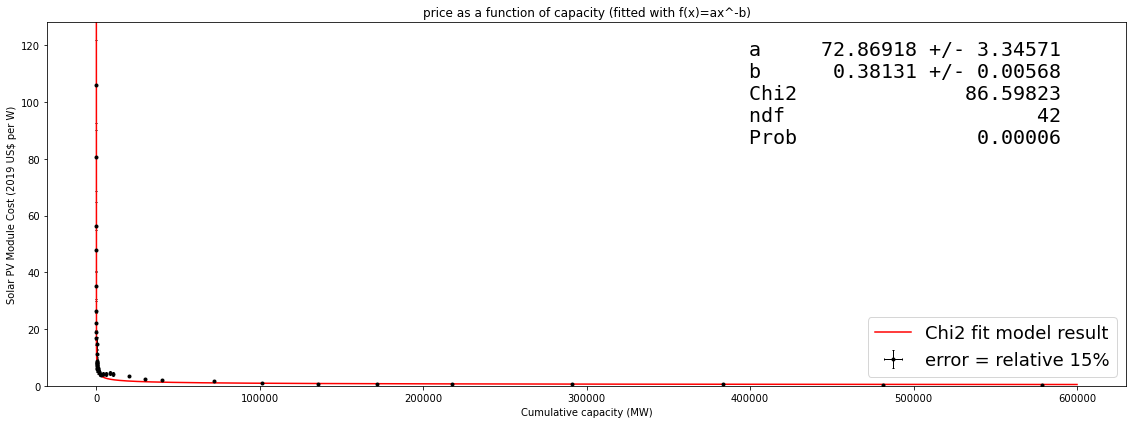

In [11]:

fig, ax = plt.subplots(figsize=(16, 6))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='error = relative 15%', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="Cumulative capacity (MW)", # the label of the y axis
       ylabel="Solar PV Module Cost (2019 US$ per W)",  # the label of the y axis
       title="price as a function of capacity (fitted with f(x)=ax^-b)", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

xmin, xmax = 0,600000
# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 5000000)
ax.plot(x_axis, fit_pdf(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a': [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'b': [minuit_chi2.values['b'], minuit_chi2.errors['b']],
 #    'sigma':       [minuit_chi2.values['sigma'], minuit_chi2.errors['sigma']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }


text = nice_string_output(d, extra_spacing=2, decimals=5)
add_text_to_ax(0.65, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower right', fontsize=18); # could also be # loc = 'upper right' e.g.

fig.tight_layout()
plt.savefig('fig3',dpi=600)
